In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/sample_data/Hawaiian_airlines_data.xlsx', sheet_name='Sheet1')
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [ ]:
df.shape

(6576, 22)

In [ ]:
df.describe()

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED
count,6576,6576.000000,6576.000000,6576.000000,6576.000000,6486.000000,6486.000000,6481.000000,6481.000000,6479.000000,6479.000000,6479.000000,6475.000000,6475.000000,6576.000000
mean,2024-01-15 19:37:52.992700672,231.262318,32643.262013,32642.412865,1252.795773,1262.765032,9.958526,13.371702,1283.411048,1416.055873,8.448217,1427.442815,10.664710,14.051429,0.014599
min,2024-01-01 00:00:00,1.000000,30423.000000,30423.000000,30.000000,11.000000,-22.000000,5.000000,1.000000,3.000000,1.000000,1.000000,-58.000000,0.000000,0.000000
25%,2024-01-08 00:00:00,70.000000,32134.000000,32134.000000,910.000000,909.000000,-4.000000,9.000000,923.000000,1048.000000,5.000000,1055.500000,-4.000000,0.000000,0.000000
50%,2024-01-16 00:00:00,206.000000,32402.000000,32402.000000,1235.000000,1238.500000,1.000000,12.000000,1251.000000,1403.000000,7.000000,1412.000000,3.000000,3.000000,0.000000
75%,2024-01-24 00:00:00,337.000000,32982.000000,32982.000000,1562.500000,1612.000000,12.000000,15.000000,1624.000000,1823.000000,11.000000,1830.000000,16.000000,16.000000,0.000000
max,2024-01-31 00:00:00,1119.000000,34222.000000,34222.000000,2340.000000,2357.000000,1441.000000,107.000000,2359.000000,2400.000000,68.000000,2357.000000,1445.000000,1445.000000,1.000000
std,NaN,176.820444,701.366643,700.367095,423.105105,434.706163,40.308111,6.859835,434.374226,475.134514,4.804906,476.678968,41.821219,40.085713,0.119948


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   FL_DATE                6576 non-null   datetime64[ns]
 1   MKT_UNIQUE_CARRIER     6576 non-null   object        
 2   OP_UNIQUE_CARRIER      6576 non-null   object        
 3   TAIL_NUM               6486 non-null   object        
 4   OP_CARRIER_FL_NUM      6576 non-null   int64         
 5   ORIGIN_CITY_MARKET_ID  6576 non-null   int64         
 6   ORIGIN_CITY_NAME       6576 non-null   object        
 7   ORIGIN_STATE_ABR       6576 non-null   object        
 8   DEST_CITY_MARKET_ID    6576 non-null   int64         
 9   DEST_CITY_NAME         6576 non-null   object        
 10  DEST_STATE_ABR         6576 non-null   object        
 11  CRS_DEP_TIME           6576 non-null   int64         
 12  DEP_TIME               6486 non-null   float64       
 13  DEP

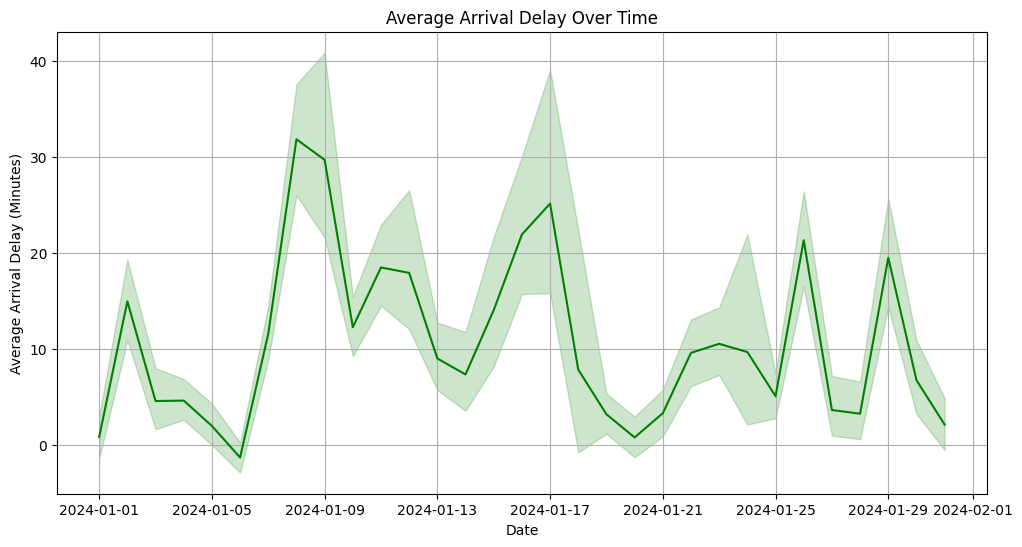

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='FL_DATE', y='ARR_DELAY', estimator='mean', color='green')
plt.title('Average Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.grid(True)
plt.show()

In [ ]:
top_cities_df = df['ORIGIN_CITY_NAME'].value_counts().head(10).reset_index()
top_cities_df.columns = ['Origin City', 'Flight Count']
print('Top 10 Origin Cities by Flight Count:')
print(top_cities_df)

Top 10 Origin Cities by Flight Count:
         Origin City  Flight Count
0       Honolulu, HI          2684
1        Kahului, HI          1137
2          Lihue, HI           730
3           Kona, HI           667
4           Hilo, HI           442
5    Los Angeles, CA           188
6      Las Vegas, NV           117
7        Oakland, CA            88
8  San Francisco, CA            64
9       Portland, OR            63


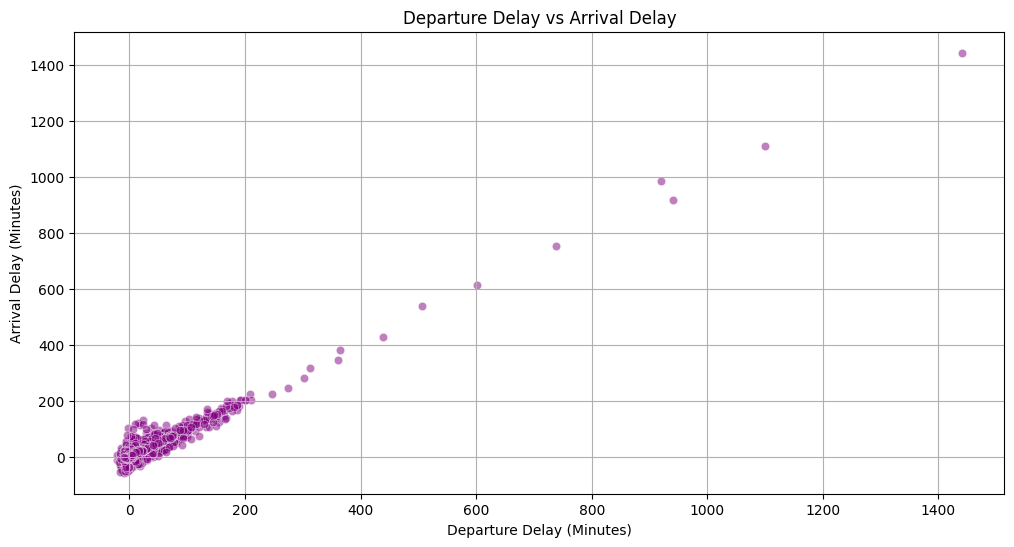

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='DEP_DELAY', y='ARR_DELAY', alpha=0.5, color='purple')
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.grid(True)
plt.show()

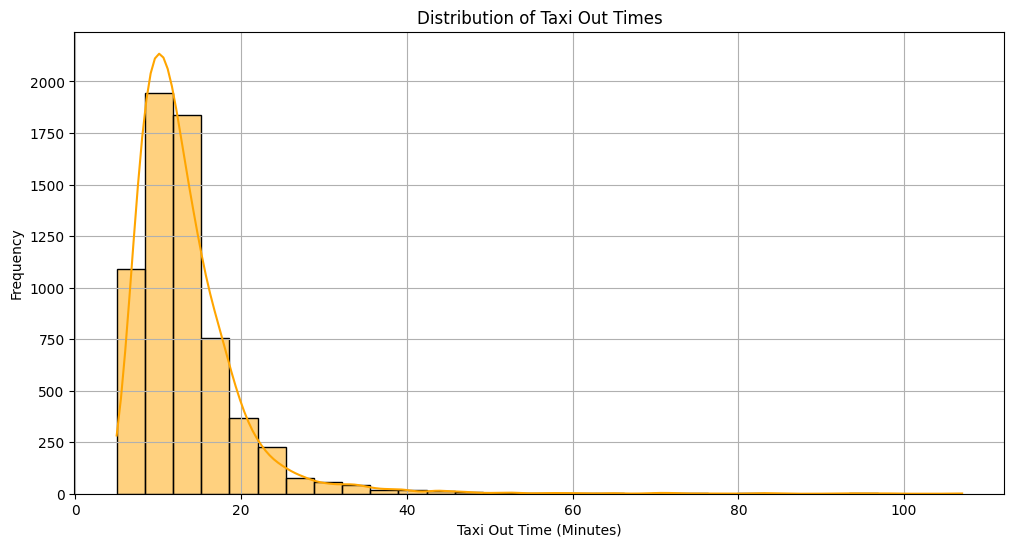

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['TAXI_OUT'], bins=30, kde=True, color='orange')
plt.title('Distribution of Taxi Out Times')
plt.xlabel('Taxi Out Time (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-10-eb1c121a971f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['CANCELLED'] == 1], x='ORIGIN_STATE_ABR', palette='viridis')


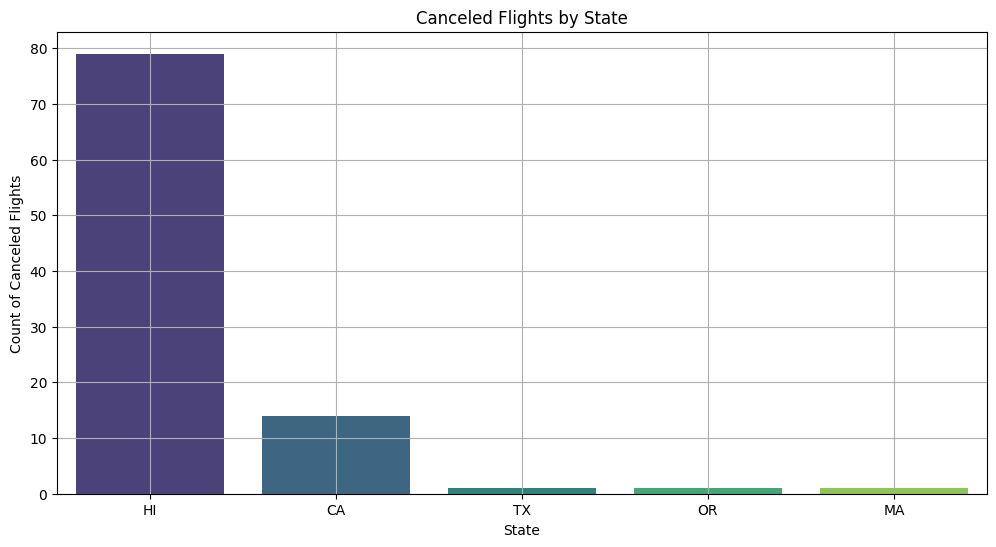

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['CANCELLED'] == 1], x='ORIGIN_STATE_ABR', palette='viridis')
plt.title('Canceled Flights by State')
plt.xlabel('State')
plt.ylabel('Count of Canceled Flights')
plt.grid(True)
plt.show()

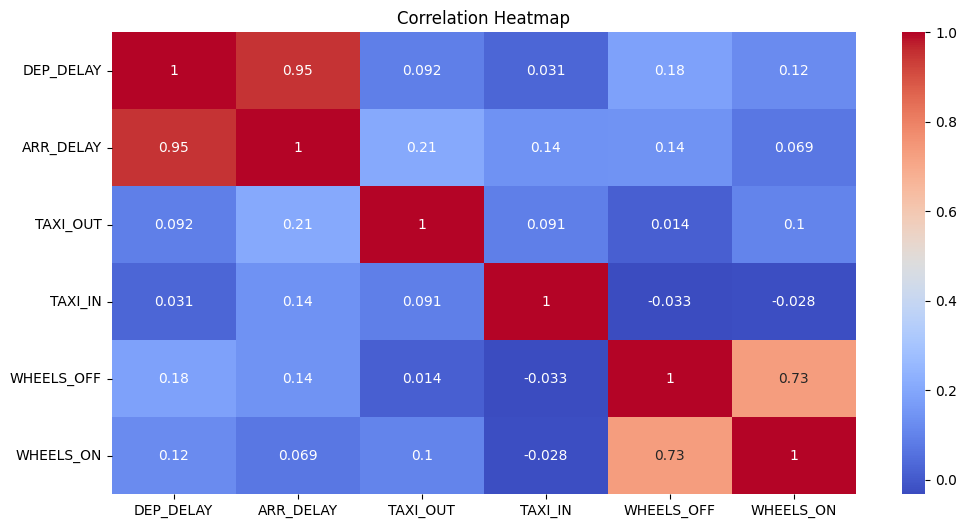

In [ ]:
plt.figure(figsize=(12, 6))
corr = df[['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'TAXI_IN', 'WHEELS_OFF', 'WHEELS_ON']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

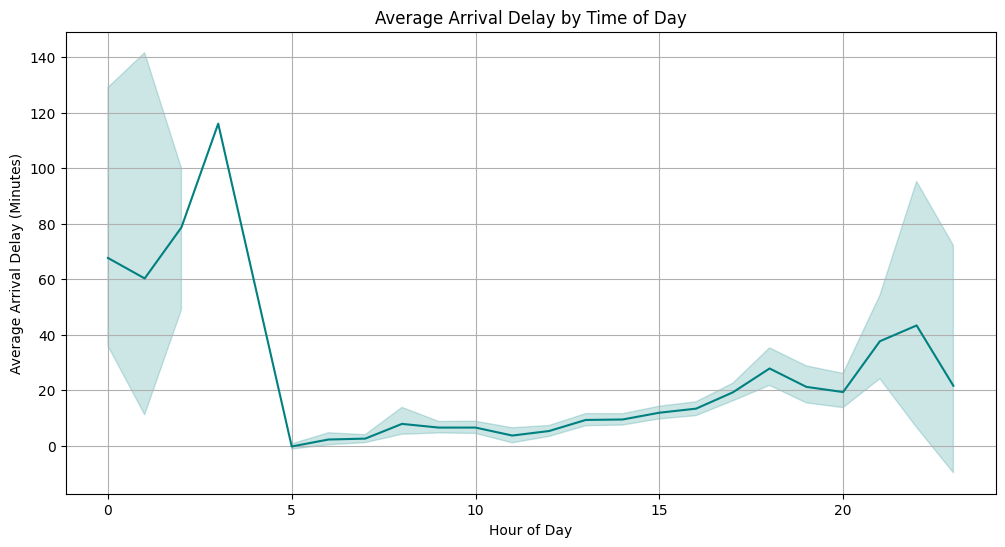

In [ ]:
plt.figure(figsize=(12, 6))
df['Hour'] = df['DEP_TIME'] // 100
sns.lineplot(data=df, x='Hour', y='ARR_DELAY', estimator='mean', color='teal')
plt.title('Average Arrival Delay by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.grid(True)
plt.show()

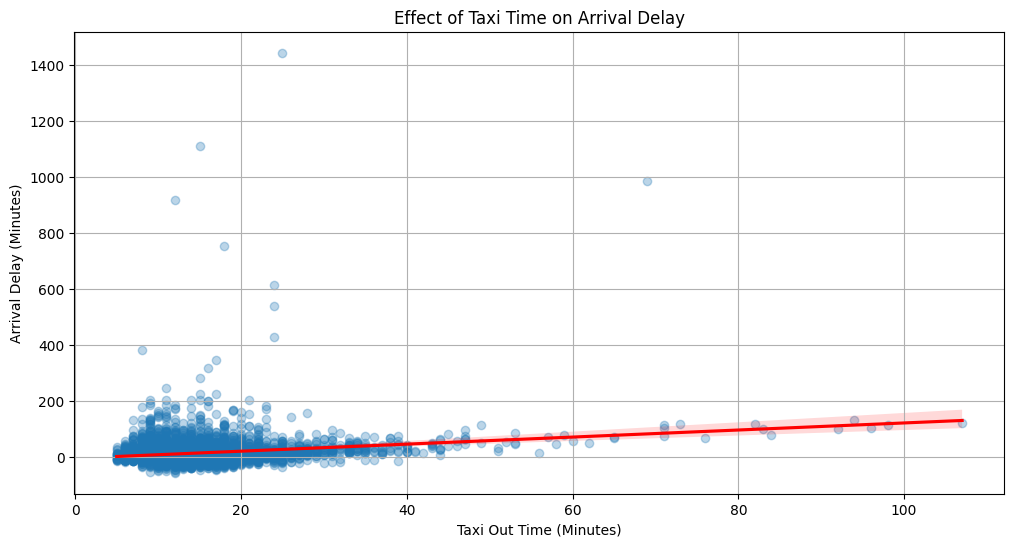

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='TAXI_OUT', y='ARR_DELAY', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Effect of Taxi Time on Arrival Delay')
plt.xlabel('Taxi Out Time (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.grid(True)
plt.show()

<ipython-input-14-0235ebf981bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='DayOfWeek', y='ARR_DELAY', estimator='mean', palette='viridis')


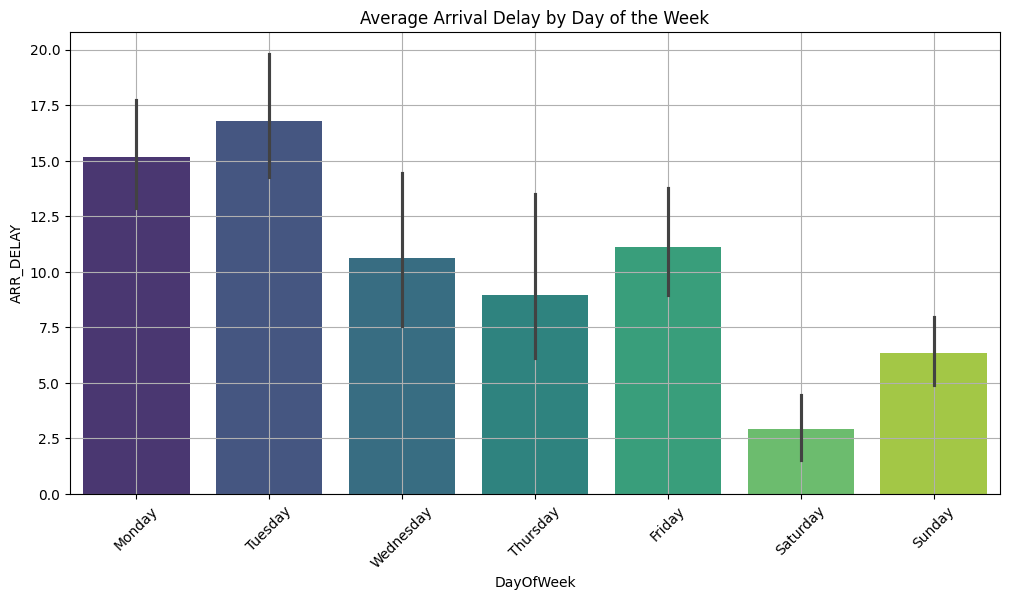

In [ ]:
plt.figure(figsize=(12, 6))
df['DayOfWeek'] = df['FL_DATE'].dt.day_name()
sns.barplot(data=df, x='DayOfWeek', y='ARR_DELAY', estimator='mean', palette='viridis')
plt.title('Average Arrival Delay by Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Stationarity Test

In [ ]:
df.columns

Index(['FL_DATE', 'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'DEST_CITY_MARKET_ID', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'Hour', 'DayOfWeek'],
      dtype='object')

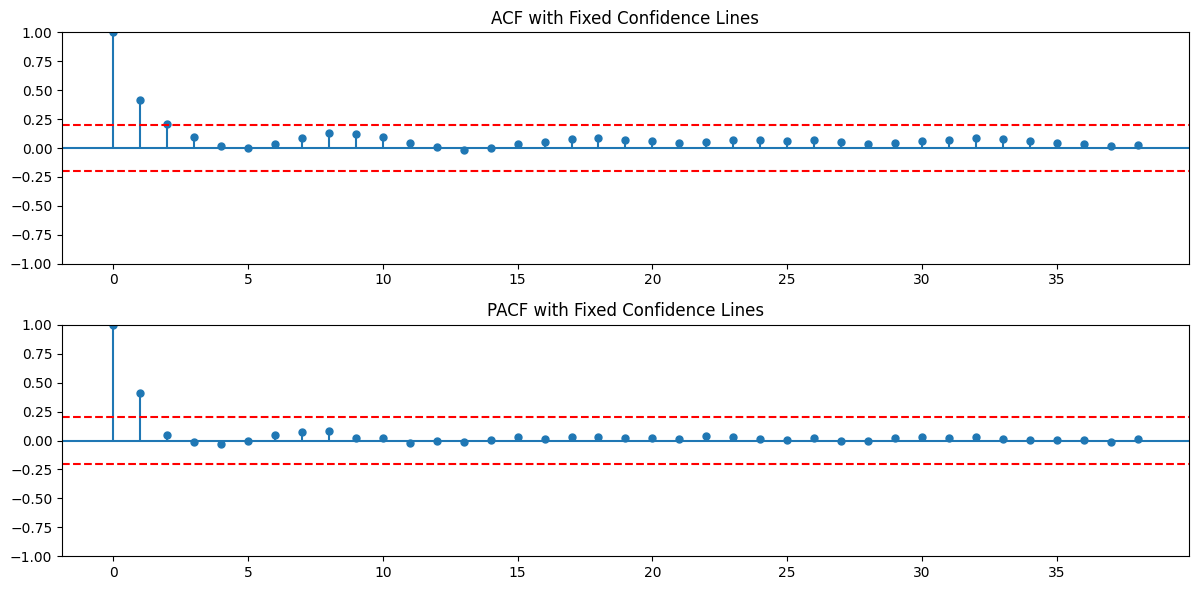

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df_cleaned = df[(df['DEP_DELAY'] < df['DEP_DELAY'].quantile(0.95)) &
                 (df['DEP_DELAY'] > df['DEP_DELAY'].quantile(0.05
                 ))]
N = len(df['DEP_DELAY'].dropna())
conf_interval = 1.96 / np.sqrt(N)
conf_interval = conf_interval

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df_cleaned['DEP_DELAY'].dropna(), ax=plt.gca(), alpha=None)
plt.axhline(y=0.2, linestyle='--', color='red')
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.title('ACF with Fixed Confidence Lines')

plt.subplot(212)
plot_pacf(df_cleaned['DEP_DELAY'].dropna(), ax=plt.gca(), alpha=None)
plt.axhline(y=0.2, linestyle='--', color='red')
plt.axhline(y=-0.2, linestyle='--', color='red')
plt.title('PACF with Fixed Confidence Lines')

plt.tight_layout()
plt.show()

In [ ]:
# checking stationarity using ADT TEST
from statsmodels.tsa.stattools import adfuller,kpss

print('Assumption: Checking Stationarity of Departure Delay Over Time')
print('Null Hypothesis (H0): The data has a unit root and is non-stationary.')
print('Alternative Hypothesis (H1): The data is stationary.')

result = adfuller(df['DEP_DELAY'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print(f'\t{key}: {value}')

if result[1] < 0.05:
    print('\nReject the Null Hypothesis. The data is stationary.')
else:
    print('\nFail to Reject the Null Hypothesis. The data is non-stationary.')

Assumption: Checking Stationarity of Departure Delay Over Time
Null Hypothesis (H0): The data has a unit root and is non-stationary.
Alternative Hypothesis (H1): The data is stationary.
ADF Statistic: -10.330299331796514
p-value: 2.8540842090498233e-18
Critical Values:
	1%: -3.4313631487632765
	5%: -2.8619877244359344
	10%: -2.56700832043236

Reject the Null Hypothesis. The data is stationary.


In [ ]:
print('Assumption: Checking Stationarity of Arrival Delay Over Time')
print('Null Hypothesis (H0): The data has a unit root and is non-stationary.')
print('Alternative Hypothesis (H1): The data is stationary.')

result = adfuller(df['ARR_DELAY'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print(f'\t{key}: {value}')

if result[1] < 0.05:
    print('\nReject the Null Hypothesis. The data is stationary.')
else:
    print('\nFail to Reject the Null Hypothesis. The data is non-stationary.')

Assumption: Checking Stationarity of Arrival Delay Over Time
Null Hypothesis (H0): The data has a unit root and is non-stationary.
Alternative Hypothesis (H1): The data is stationary.
ADF Statistic: -8.485755049204988
p-value: 1.3547856591889135e-13
Critical Values:
	1%: -3.4313658242914604
	5%: -2.8619889065867783
	10%: -2.5670089497174104

Reject the Null Hypothesis. The data is stationary.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'ts_data' contains your cleaned time series data
ts_data = df['DEP_DELAY'].dropna()

# Fit MA(1) model
model_ma1 = ARIMA(ts_data, order=(3, 1, 3))
results_ma1 = model_ma1.fit()

# Print summary of MA(1)
print("ARMA(3,1,3) Model Summary:")
print(results_ma1.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

ARMA(3,1,3) Model Summary:
                               SARIMAX Results                                
Dep. Variable:              DEP_DELAY   No. Observations:                 6486
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -33069.298
Date:                Mon, 31 Mar 2025   AIC                          66152.596
Time:                        18:09:46   BIC                          66200.037
Sample:                             0   HQIC                         66169.007
                               - 6486                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4105      0.184     -7.684      0.000      -1.770      -1.051
ar.L2         -0.6326      0.174     -3.632      0.000      -0.974      -0.291
ar.L3          0.0872    

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'ts_data' contains your cleaned time series data
ts_data = df['DEP_DELAY'].dropna()

# Fit MA(1) model
model_ma1 = ARIMA(ts_data, order=(0, 0, 2))
results_ma1 = model_ma1.fit()

# Print summary of MA(1)
print("MA(2) Model Summary:")
print(results_ma1.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


MA(2) Model Summary:
                               SARIMAX Results                                
Dep. Variable:              DEP_DELAY   No. Observations:                 6486
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -33115.347
Date:                Mon, 31 Mar 2025   AIC                          66238.693
Time:                        15:42:51   BIC                          66265.803
Sample:                             0   HQIC                         66248.070
                               - 6486                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9585      1.013      9.826      0.000       7.972      11.945
ma.L1          0.1101      0.005     23.499      0.000       0.101       0.119
ma.L2          0.0718      0.00

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Refit the MA(2) model (assuming daily_bookings dataframe is available)
model_ma2 = ARIMA(df['DEP_DELAY'], order=(0, 0, 2))
results_ma2 = model_ma2.fit()

# Now check for parameter redundancy
# 1. Examine parameter correlation matrix
corr_matrix = results_ma2.cov_params().corr()
print("Parameter Correlation Matrix:")
print(corr_matrix)

# 2. Calculate Fisher Information Matrix rank
import numpy as np
from scipy import linalg

cov_matrix = results_ma2.cov_params()
# Fisher Information Matrix is inverse of covariance matrix
fim = linalg.inv(cov_matrix)
rank = np.linalg.matrix_rank(fim)
n_params = len(results_ma2.params)

print(f"\nFisher Information Matrix Rank: {rank}")
print(f"Number of parameters: {n_params}")
print(f"Redundancy check: {'Parameters are redundant' if rank < n_params else 'No parameter redundancy detected'}")


Parameter Correlation Matrix:
          const     ma.L1     ma.L2    sigma2
const   1.00000 -0.998830 -0.998080 -0.995560
ma.L1  -0.99883  1.000000  0.999862  0.998937
ma.L2  -0.99808  0.999862  1.000000  0.999446
sigma2 -0.99556  0.998937  0.999446  1.000000

Fisher Information Matrix Rank: 4
Number of parameters: 4
Redundancy check: No parameter redundancy detected
